# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import librosa as lr
from IPython.display import Audio

def calc_dft(x):
    
    N = len(x)
    n = np.arange(N)
    X = np.zeros(N, dtype=complex)
    
    for k in range(N):
        X[k] = np.sum(x * np.exp(-1j * 2 * np.pi * n * k / N))
    
    return X

<div style="background-color:lightyellow;border:solid grey;padding:10px">

<b>Aufgabe 1:</b> Konstruiert ein Signal per additiver Synthese mit den Frequenzen $500$ Hz und $560$ Hz mit Sample-Rate $8000$ Hz mit einer Länge von $1$ Sekunde und speichert es unter der Variable `x`. (Nicht vergessen, dass das Signal sich weiterhin in der Range `[-1, 1]` befinden sollte.)
    
</div>

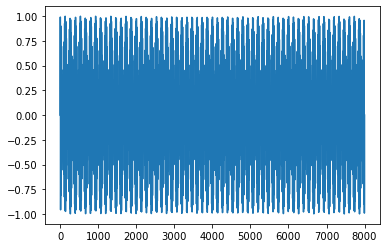

In [2]:
freq1 = ...
freq2 = ...

sr = ...
length = ...

...
x = ...

display(Audio(x, rate=sr))

plt.plot(x)
plt.show()

Dann nehmen wir eine kleine Änderung am Signal vor:

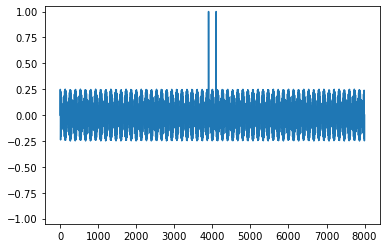

In [3]:
x_ = x * 0.25
x_[3900] = 1
x_[4100] = 1

display(Audio(x_, rate=sr))

plt.plot(x_)
plt.ylim(-1.05, 1.05)
plt.show()

In [4]:
# code aus der letzten session in eine funktion gepackt:

def calc_stft(x, hop_size=50, window_size=100):

    num_windows = (len(x) - window_size) // hop_size
    stft = np.zeros((window_size, num_windows), dtype=complex)

    for win_idx in range(num_windows):
        start_i = win_idx * hop_size
        stop_i = start_i + window_size
        win = x[start_i:stop_i]

        stft[:, win_idx] = calc_dft(win)
    
    return stft

<div style="background-color:lightyellow;border:solid grey;padding:10px">
    
<b>Aufgabe 2:</b> Führt mit der Funktion `calc_stft` eine STFT unseres variierten Audiosignals `x_` durch und speichert sie in der Variable `stft`. Die Argumente `win_len` und `hop_size` könnt ihr selbst wählen. Schafft ihr es, eine Einstellung der beiden Argumente zu finden, damit sowohl die beiden Sinus-Töne, als auch die Klicks jeweils voneinander getrennt dargestellt werden können?

</div>

In [ ]:
window_size = ...
hop_size = ...

stft = ...


plt.figure()
plt.title('window_size: %d, hop_size: %d' % (window_size, hop_size))
plt.imshow(np.log10(1 + np.abs(stft) * 10), aspect='auto', extent=[0, 1, 0, sr], origin='lower')
plt.ylim(300, 800)
plt.show()